# 2. Multicategory Perceptron Training Algorithm

In [1]:
import os
import path
import struct
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Source for reading the idx files as numpy arrays: https://gist.github.com/tylerneylon
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [3]:
# Source for reading the idx files as numpy arrays: https://gist.github.com/tylerneylon
def read_idx_gz(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [4]:
def step_fn(x):
    i = 0
    y = np.empty([10,1])
    for each in x:
        if each >= 0:
            y[i] = 1.0
        else:
            y[i] = 0.0
        i += 1
    return y

In [5]:
def training_errors(epoch, errors):
    for i in range(n):
        xi = train_data[i]
        xi.resize(784, 1)
        v = np.matmul(w,xi)
        prediction = v.argmax(axis=0)
        actual = train_labels[i]
        if prediction != actual:
            errors[epoch] += 1
    return errors[epoch]

In [6]:
def update_weight(w):
    for i in range(n):
        xi = train_data[i]
        xi.resize(784, 1)
        y = np.array(step_fn(np.matmul(w,xi)))
        label = np.zeros((1,10)).T
        label[train_labels[i]] = 1
        difference = label - y
        xit = np.transpose(xi)
        update = learning_rate * np.matmul(difference, xit)
        w += update

In [7]:
def learning_weights(w, epoch, threshold, learning_rate):
    while epoch<100:
        errors.append(0)
        errors[epoch] = training_errors(epoch, errors)
        update_weight(w)
        epoch += 1
        if errors[epoch-1]/n <= threshold:
            break

In [8]:
def plot_graph(errors):
    fig, ax = plt.subplots(figsize=(10,10))
    plt.plot(range(len(errors)), errors, c = 'green')
    plt.ylabel('Number of Misclassifications')
    plt.xlabel('Number of Epochs')
    plt.title('Errors vs Epochs')
    plt.show()

In [9]:
def find_errors():
    test_errors = 0
    for i in range(len(test_data)):
        xi = test_data[i]
        xi.resize(784, 1)
        v = np.matmul(w ,xi)
        prediction = v.argmax(axis=0)
        actual = test_labels[i]
        if prediction != actual:
            test_errors += 1
    print("Number of errors in test data: ", test_errors)
    print("Percentage of test errors: ", test_errors*100/len(test_data))

In [10]:
# Data Source: http://yann.lecun.com/exdb/mnist/
train_data = read_idx_gz('train-images-idx3-ubyte.gz')
train_labels = read_idx_gz('train-labels-idx1-ubyte.gz')
test_data = read_idx_gz('t10k-images-idx3-ubyte.gz')
test_labels = read_idx_gz('t10k-labels-idx1-ubyte.gz')

In [91]:
w = np.random.uniform(-1, 1, size=(10,784))
n = 50
epoch = 0
threshold = 0.0
learning_rate = 1.0
errors = []

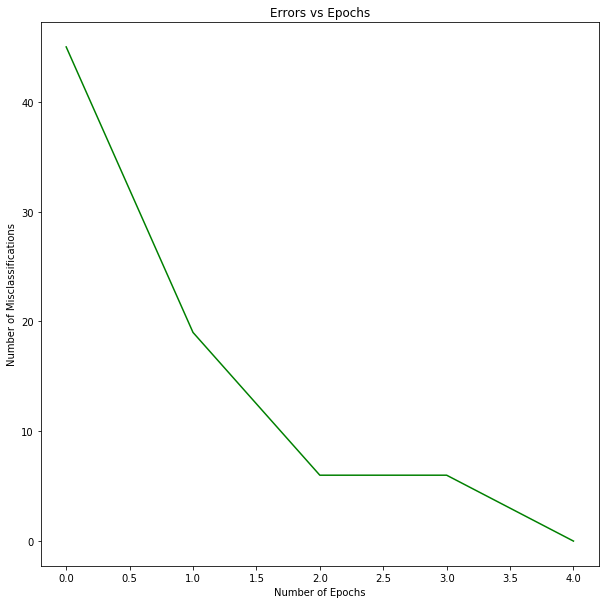

Number of errors in test data:  4227
Percentage of test errors:  42.27


In [92]:
learning_weights(w, epoch, threshold, learning_rate)
plot_graph(errors)
find_errors()

<b> (f) Indeed, the training part of the network terminates with 0 errors eventually and number of misclassifications decrease exponentially as number of epochs rise. We have 0% error according to our training samples because our network has been trained on those training examples itself and due to that it overfits those training examples and gives 100% accuracy on only those examples. The learned weights cannot generalize better to new unseen examples and therefore the test accuracy is lower (test error is high) than the training accuracy at a higher epoch. Furthermore, we observe that number of misclassifications in the training set comes down to 0% error after about 3 epochs. <br>
    
   The network got only 50 examples (small number of samples) to train on and after that it was evaluated on 10,000 test samples. Hence, the network was biased towards those 50 training samples and also had the opportunity to fine tune its weights and learn more but couldn't. Therefore, the test error rate is high and not 0%. <br>
   
   <br> However at 0th epoch, the percentage of errors obtained in test data is 42.27% and far lower than the initial error obtained in the training data because we have updated the weights accordingly and the network better understands how to process the inputs after being trained for 5 epochs and not just take randomly initialized values for its weights. <b>

In [121]:
w = np.random.uniform(-1, 1, size=(10,784))
n = 1000
epoch = 0
threshold = 0.0
learning_rate = 1.0
errors = []

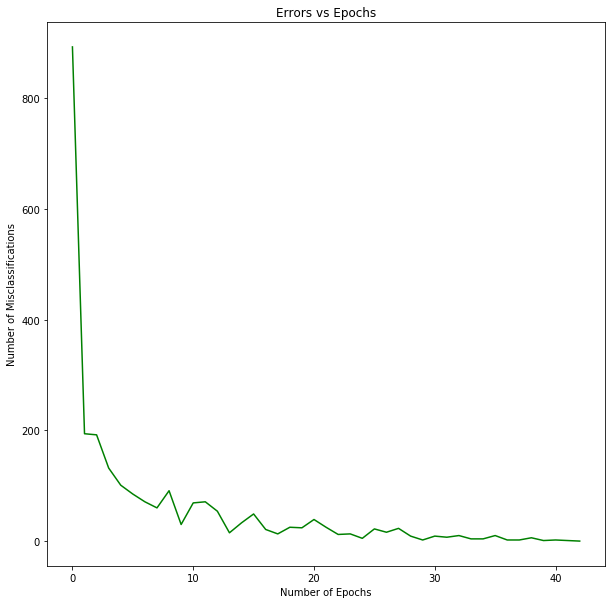

Number of errors in test data:  1673
Percentage of test errors:  16.73


In [122]:
learning_weights(w, epoch, threshold, learning_rate)
plot_graph(errors)
find_errors()

<b> (g) We observe that number of misclassifications in the training set comes down to 0% error after about 33 epochs. The number of epochs the network took to converge increased because there are 1000 training samples now (far more than 50) and it would be more probable to errors this time. <br>
    
   The network got only 1000 examples to train on and after that it was evaluated on 10,000 test samples. Hence, the network was biased towards those 1000 training samples and also had the opportunity to fine tune its weights and learn more but couldn't. Therefore, the test error rate is high and not 0%. <br>
   
   <br> The percentage of errors obtained in test data is 16.73% and far lower than the initial error obtained in the training data but not 0% eventually because we have updated the weights accordingly and the network better understands how to process the inputs after being trained for 33 epochs and not just take randomly initialized values for its weights. <br> 
   
   The network has now been trained on 1000 examples (far more than 50 samples as in (f)) which is a lot more data as compared to (f) and the PTA algorithm has also run for far more epochs. Hence, the network now has better approximation of weights and has also approached convergence more far more as compared to (f). It is far more likely that the network might have seen (been trained on) all the 0 - 9 labeled samples which is less probable in the case of (f). The error rate in the test set decreases as the number of training examples in the training set increases as the network has learned more efficiently on a larger set of training samples. Therefore, there is a lower test set error rate of 16.73% in the case of n = 1000 as compared to an error of 42.27% in the case where n = 50. <br>
   
   However, the error rate approaches 0 but it can never be 0 because we want a more generalized model which is simply not overfitted on training samples and which is capable to handling unseen test samples and does not do a bad job in classifying the test samples.<b>

In [123]:
w = np.random.uniform(-1, 1, size=(10,784))
n = 60000
epoch = 0
threshold = 0.0
learning_rate = 1.0
errors = []

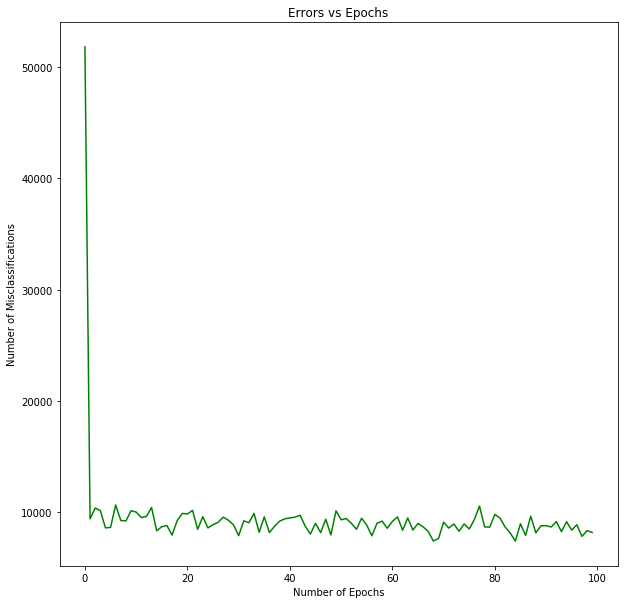

Number of errors in test data:  1519
Percentage of test errors:  15.19


In [124]:
learning_weights(w, epoch, threshold, learning_rate)
plot_graph(errors)
find_errors()

<b> (h) The number of epochs have been limited to 100. After the first few epochs, we observe that the error rate does not fall anymore and we just keeps oscillating between 7,000 to 12,000 for the training data. <br>
    
   For the testing data, the percentage of misclassified data is 15.19% which is more or less similar to n = 1000. This means that the network has learned a sufficient amount of knowledge from just 1000 samples and performs only a little bit better when trained over all 60,000 training samples. <b>

<b> (i) Based on the above results the threshold value I have chosen is 0.15 because it converges quickly and the results are still comparable to a lower threshold value <br> <b>

#### First Time

In [17]:
w = np.random.uniform(-1, 1, size=(10,784))
n = 60000
epoch = 0
threshold = 0.15
learning_rate = 1.0
errors = []

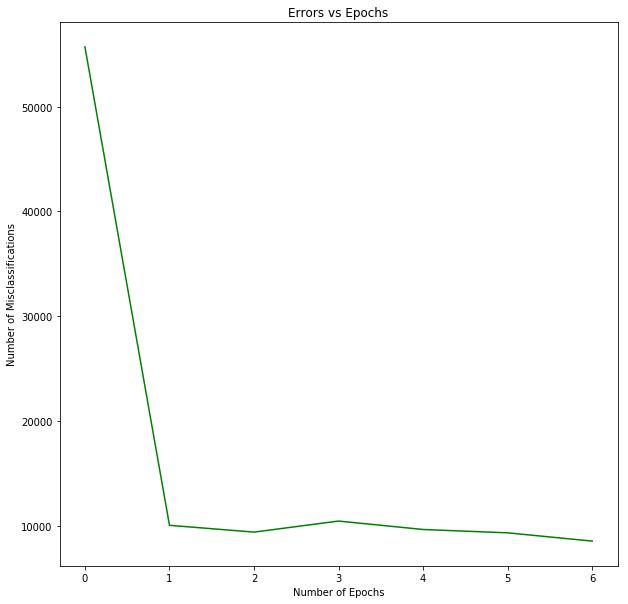

Number of errors in test data:  1626
Percentage of test errors:  16.26


In [18]:
learning_weights(w, epoch, threshold, learning_rate)
plot_graph(errors)
find_errors()

#### Second Time

In [19]:
w = np.random.uniform(-1, 1, size=(10,784))
n = 60000
epoch = 0
threshold = 0.15
learning_rate = 1.0
errors = []

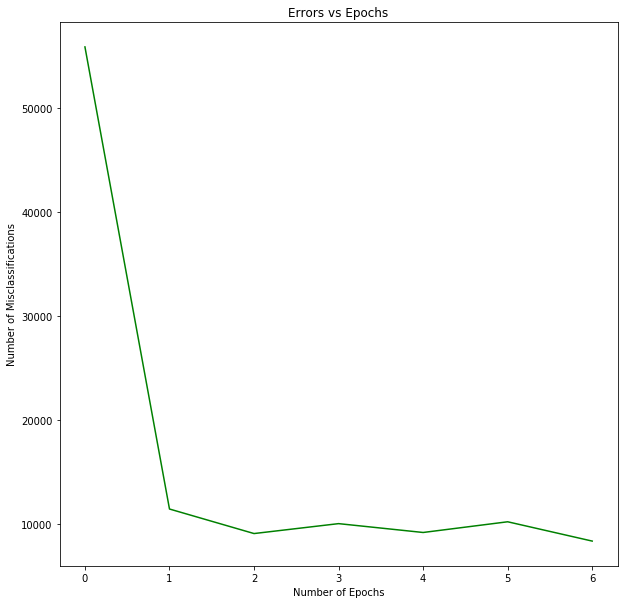

Number of errors in test data:  1482
Percentage of test errors:  14.82


In [20]:
learning_weights(w, epoch, threshold, learning_rate)
plot_graph(errors)
find_errors()

#### Third Time

In [21]:
w = np.random.uniform(-1, 1, size=(10,784))
n = 60000
epoch = 0
threshold = 0.15
learning_rate = 1.0
errors = []

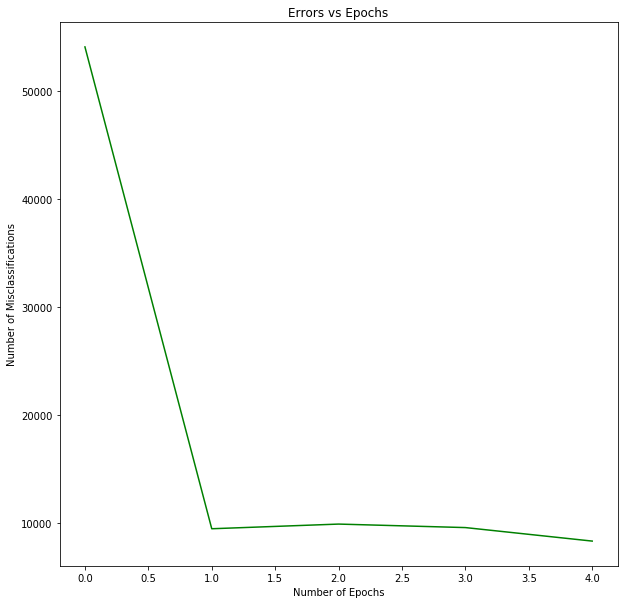

Number of errors in test data:  1562
Percentage of test errors:  15.62


In [22]:
learning_weights(w, epoch, threshold, learning_rate)
plot_graph(errors)
find_errors()

<b> As we can see the graph looks similar for all three attempts. The percentage of error varies from 14-16% which is still comparable to the results where n = 1000. <b>